EVALUASI MODEL

untuk mencari algoritma yang bagus dalam suatu kasus berdasarkan dataset yang kita berikan untuk menyelesaikan masalah tertentu. Dalam instilah machine learning di sebut Best Fit.

In [ ]:
# import library
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#load breast cancer data set
diabetes_data = load_breast_cancer()



In [ ]:
#convert data to dataframe
import pandas as pd
import numpy as np
df_breast_cancer = pd.DataFrame(data=diabetes_data.data, columns = diabetes_data.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

X = diabetes_data.data
y = diabetes_data.target

# create independent and dependent variabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=24)
print(f"Train Data : {X_train.shape}, {y_train.shape}")
print(f"Test Data : {X_test.shape}, {y_test.shape}")

Train Data : (455, 30), (455,)
Test Data : (114, 30), (114,)


In [ ]:
# training a binary classifier using random forest algorithm

classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)


# here X_testm y_test are tge test data points
predictions = classifier.predict(X_test)

[[39  2]
 [ 4 69]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


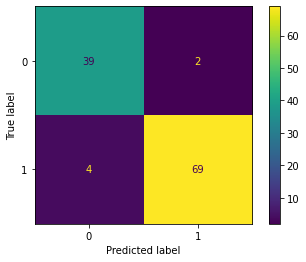

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion matrix function a matrix containing the summary of prediction 
print(confusion_matrix(y_test, predictions))

#plot confusion matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

# pattern
# True Negatif  | False positif
# false negatif | True positif

In [ ]:
# rumus manual 
TP = 69
TN = 39
FP = 2
FN = 4
# manual 
accuracy = (TP + TN)/(TP+TN+FP+FN)
print(accuracy)

0.9473684210526315


In [ ]:
# import all necessary library
from sklearn.metrics import accuracy_score

# calculating the accuracy of classifier
print(f"Accuracy of the classifier is : {accuracy_score(y_test, predictions)}")

  

Accuracy of the classifier is : 0.9473684210526315


PRECISION 

presentase kejadian positif dari total kejadian positif yang di perediksi

In [ ]:
from sklearn.metrics import precision_score
# calculating the precission score of the classifier
print(f"Precision Score of the classifier is : {precision_score(y_test, predictions)}")

Precision Score of the classifier is : 0.971830985915493


In [ ]:
#manual 
precission = TP/(TP+FP)
print(precission)

0.971830985915493


RECALL / Sensitivity/ True positive rate

presentase kejadian positif dari total kejadian positif aktual.

In [ ]:
from sklearn.metrics import recall_score
# calculating recall
print(f"Recall score of the classifier is : {recall_score(y_test, predictions)}")


Recall score of the classifier is : 0.9452054794520548


In [ ]:
recall = TP / ( TP + FN )
print(recall)

0.9452054794520548


Specificity
presentase kejadian negatif dari total kejadian negatif

In [ ]:
#import all necessary libraries
from imblearn.metrics import specificity_score
# calculating the specification score of classifier
print(f"Specificity score of the classifier is : {specificity_score(y_test, predictions)}")

Specificity score of the classifier is : 0.9512195121951219


In [ ]:
# manual 
specificity = TN / (TN+FP)
print(specificity)

0.9512195121951219


F1 Score
ini adalah rata rata presiccion dan recall yang harmonis. mengambil kontribusi keduanya jadi semakin tinggi skor F1 semakin baik

In [ ]:
from sklearn.metrics import f1_score
# calculating the f1 score
print(f"Specificity score of the classifier is : {f1_score(y_test, predictions)}")

Specificity score of the classifier is : 0.9583333333333334


In [ ]:
# manual 
f1Score = (2 * precission * recall) / (precission + recall)
print(f1Score)

0.9583333333333334


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



ROC

merupakan singkatan dari (Receive Operating Characteristic) dan di gambarkan dalam grafik dari nilai TPR dan FRP.ROC adalah metrik evaluasi yang banyak di gunakan

TPR = RECALL = TP / TP + FN

FALSE POSITIVE RATE (FPR) = 1 = Specificity = FP / TN + FP

AUC for out classifier is : 0.9769462078182426


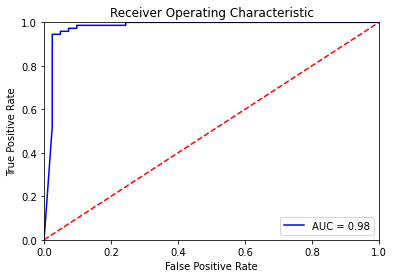

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print(f"AUC for out classifier is : {roc_auc}")
# plotting the roc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()